# Daily Weather Data EDA and Initial Analysis

<b>Importing important packages, getting a view of data</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/raw/daily_weather_data.csv")
df.head(10)

,date,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunset,sunrise,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,showers_sum,rain_sum,wind_gusts_10m_max,wind_speed_10m_max,weather_code
0,1996-03-24 04:00:00+00:00,3.571250,-1.6725,10.427501,6.503645,-6.534769,-0.805065,0,0,0.000000,0.0,44429.293,40204.098,0.000000,0.0,0.000000,32.399998,17.102840,2.0
1,1996-03-25 04:00:00+00:00,7.252501,-0.4225,14.877501,11.621281,-4.275804,3.464109,0,0,0.000000,0.0,44592.535,38571.273,0.000000,0.0,0.000000,45.360000,23.933907,3.0
2,1996-03-26 04:00:00+00:00,9.979583,4.7775,12.477500,8.811361,-0.872341,5.869757,0,0,0.000000,0.0,44755.977,38916.668,0.000000,0.0,0.000000,39.239998,21.316135,3.0
3,1996-03-27 04:00:00+00:00,1.598334,-1.7225,4.927500,0.189901,-7.659895,-3.551320,0,0,0.000000,0.0,44919.523,41750.184,0.000000,0.0,0.000000,37.440000,19.469976,3.0
4,1996-03-28 04:00:00+00:00,-0.003750,-3.4725,4.677500,0.959791,-7.904518,-4.305830,0,0,4.600000,7.0,45083.074,24470.809,3.220000,0.0,0.000000,27.000000,14.400000,73.0
5,1996-03-29 04:00:00+00:00,0.517083,-1.3225,3.577500,-0.139646,-5.901703,-4.023909,0,0,13.700003,16.0,45246.530,14942.428,7.699999,0.0,2.700000,38.160000,19.586119,73.0
6,1996-03-30 04:00:00+00:00,1.733750,-4.5225,9.077500,8.146088,-8.964521,-1.636094,0,0,0.000000,0.0,45409.780,42235.645,0.000000,0.0,0.000000,23.400000,13.358861,2.0
7,1996-03-31 04:00:00+00:00,5.996250,0.2275,13.477500,12.330812,-2.640469,3.656948,0,0,0.000000,0.0,45572.740,42396.535,0.000000,0.0,0.000000,20.160000,11.681987,3.0
8,1996-04-01 04:00:00+00:00,5.592083,1.3275,8.527500,5.787340,-1.546260,2.681668,0,0,6.599999,10.0,45735.285,10645.435,0.000000,0.0,6.599999,23.039999,18.532133,61.0
9,1996-04-02 04:00:00+00:00,5.965000,2.3275,10.227500,4.914607,-3.611577,0.372627,0,0,11.600000,9.0,45897.320,39350.540,0.000000,0.0,11.600000,57.960000,30.124065,61.0


<b>Initial Observations:
<ul><li><u>Redundant Columns:</u> Can most likely remove some unnecessary fields to avoid redundancy and collinearity: sunset, sunrise, weather_code</li>
    </ul></b>

<b>Preliminary Data Analysis</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10543 entries, 0 to 10542
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       10543 non-null  object 
 1   temperature_2m_mean        10543 non-null  float64
 2   temperature_2m_min         10543 non-null  float64
 3   temperature_2m_max         10543 non-null  float64
 4   apparent_temperature_max   10543 non-null  float64
 5   apparent_temperature_min   10543 non-null  float64
 6   apparent_temperature_mean  10543 non-null  float64
 7   sunset                     10543 non-null  int64  
 8   sunrise                    10543 non-null  int64  
 9   precipitation_sum          10543 non-null  float64
 10  precipitation_hours        10543 non-null  float64
 11  daylight_duration          10543 non-null  float64
 12  sunshine_duration          10543 non-null  float64
 13  snowfall_sum               10543 non-null  flo

Date column needs to be transformed to datetime data type

In [8]:
df.shape

(10543, 19)

Dataset has ~10k rows with 18 columns

<b>Data Transformations</b>

In [12]:
# Delete redundant columns
df.drop(columns=['sunset','sunrise','weather_code'])

,date,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,showers_sum,rain_sum,wind_gusts_10m_max,wind_speed_10m_max
0,1996-03-24 04:00:00+00:00,3.571250,-1.6725,10.427501,6.503645,-6.534769,-0.805065,0.000000,0.0,44429.293,40204.098,0.00,0.0,0.000000,32.399998,17.102840
1,1996-03-25 04:00:00+00:00,7.252501,-0.4225,14.877501,11.621281,-4.275804,3.464109,0.000000,0.0,44592.535,38571.273,0.00,0.0,0.000000,45.360000,23.933907
2,1996-03-26 04:00:00+00:00,9.979583,4.7775,12.477500,8.811361,-0.872341,5.869757,0.000000,0.0,44755.977,38916.668,0.00,0.0,0.000000,39.239998,21.316135
3,1996-03-27 04:00:00+00:00,1.598334,-1.7225,4.927500,0.189901,-7.659895,-3.551320,0.000000,0.0,44919.523,41750.184,0.00,0.0,0.000000,37.440000,19.469976
4,1996-03-28 04:00:00+00:00,-0.003750,-3.4725,4.677500,0.959791,-7.904518,-4.305830,4.600000,7.0,45083.074,24470.809,3.22,0.0,0.000000,27.000000,14.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10538,2025-01-29 04:00:00+00:00,3.628583,-0.1485,8.701500,3.307349,-5.691112,-1.656272,0.000000,0.0,36091.926,32598.104,0.00,0.0,0.000000,56.519997,23.334137
10539,2025-01-30 04:00:00+00:00,-2.438083,-6.6985,0.601500,-3.815168,-11.210556,-7.094955,0.000000,0.0,36219.957,32262.047,0.00,0.0,0.000000,41.399998,15.464294
10540,2025-01-31 04:00:00+00:00,3.178583,0.2515,5.751500,3.620194,-4.126030,0.317210,10.299999,18.0,36350.496,0.000,0.00,0.0,10.299999,25.560000,13.527572
10541,2025-02-01 04:00:00+00:00,0.249416,-6.1985,5.751500,2.947563,-11.692727,-4.535403,2.400000,5.0,36483.363,29039.318,0.00,0.0,2.400000,50.399998,19.386591


In [13]:
# Change to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S+00:00')

In [14]:
# Add 'Week Ending' Field
df['Week Ending'] = df['date'] + pd.to_timedelta(6 - df['date'].dt.weekday, unit='D')

In [15]:
df.head(20)

,date,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunset,sunrise,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,showers_sum,rain_sum,wind_gusts_10m_max,wind_speed_10m_max,weather_code,Week Ending
0,1996-03-24 04:00:00,3.571250,-1.6725,10.427501,6.503645,-6.534769,-0.805065,0,0,0.000000,0.0,44429.293,40204.098,0.000000,0.0,0.000000,32.399998,17.102840,2.0,1996-03-24 04:00:00
1,1996-03-25 04:00:00,7.252501,-0.4225,14.877501,11.621281,-4.275804,3.464109,0,0,0.000000,0.0,44592.535,38571.273,0.000000,0.0,0.000000,45.360000,23.933907,3.0,1996-03-31 04:00:00
2,1996-03-26 04:00:00,9.979583,4.7775,12.477500,8.811361,-0.872341,5.869757,0,0,0.000000,0.0,44755.977,38916.668,0.000000,0.0,0.000000,39.239998,21.316135,3.0,1996-03-31 04:00:00
3,1996-03-27 04:00:00,1.598334,-1.7225,4.927500,0.189901,-7.659895,-3.551320,0,0,0.000000,0.0,44919.523,41750.184,0.000000,0.0,0.000000,37.440000,19.469976,3.0,1996-03-31 04:00:00
4,1996-03-28 04:00:00,-0.003750,-3.4725,4.677500,0.959791,-7.904518,-4.305830,0,0,4.600000,7.0,45083.074,24470.809,3.220000,0.0,0.000000,27.000000,14.400000,73.0,1996-03-31 04:00:00
5,1996-03-29 04:00:00,0.517083,-1.3225,3.577500,-0.139646,-5.901703,-4.023909,0,0,13.700003,16.0,45246.530,14942.428,7.699999,0.0,2.700000,38.160000,19.586119,73.0,1996-03-31 04:00:00
6,1996-03-30 04:00:00,1.733750,-4.5225,9.077500,8.146088,-8.964521,-1.636094,0,0,0.000000,0.0,45409.780,42235.645,0.000000,0.0,0.000000,23.400000,13.358861,2.0,1996-03-31 04:00:00
7,1996-03-31 04:00:00,5.996250,0.2275,13.477500,12.330812,-2.640469,3.656948,0,0,0.000000,0.0,45572.740,42396.535,0.000000,0.0,0.000000,20.160000,11.681987,3.0,1996-03-31 04:00:00
8,1996-04-01 04:00:00,5.592083,1.3275,8.527500,5.787340,-1.546260,2.681668,0,0,6.599999,10.0,45735.285,10645.435,0.000000,0.0,6.599999,23.039999,18.532133,61.0,1996-04-07 04:00:00
9,1996-04-02 04:00:00,5.965000,2.3275,10.227500,4.914607,-3.611577,0.372627,0,0,11.600000,9.0,45897.320,39350.540,0.000000,0.0,11.600000,57.960000,30.124065,61.0,1996-04-07 04:00:00


<u>NOTE:</u> First entry (1996 Mar 24) will have only one day as part of the weekly aggregations. Either need to truncate or add more data to make the week aggregation accurate.

<b>Weekly Aggregations</b>

In [18]:
# (can alter the aggregating functions as desired)

weekly_agg = df.groupby('Week Ending').agg({
    'temperature_2m_mean': 'mean',
    'temperature_2m_min': 'min',
    'temperature_2m_max': 'max',
    'apparent_temperature_max': 'max',
    'apparent_temperature_min': 'min',
    'apparent_temperature_mean': 'mean',
    'precipitation_sum': 'sum',
    'precipitation_hours': 'sum',
    'daylight_duration': 'mean',
    'sunshine_duration': 'mean',
    'snowfall_sum': 'sum',
    'showers_sum': 'sum',
    'rain_sum': 'sum'
}).reset_index()

In [20]:
weekly_agg.head(20)

,Week Ending,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,showers_sum,rain_sum
0,1996-03-24 04:00:00,3.571250,-1.672500,10.427501,6.503645,-6.534769,-0.805065,0.000000,0.0,44429.293000,40204.098000,0.000000,0.0,0.000000
1,1996-03-31 04:00:00,3.867679,-4.522500,14.877501,12.330812,-8.964521,-0.075191,18.300003,23.0,45082.879857,34754.791714,10.919999,0.0,2.700000
2,1996-04-07 04:00:00,4.881071,-0.372500,12.977500,9.744807,-4.841195,0.867544,35.800001,56.0,46217.764857,25557.522000,1.190000,0.0,34.100000
3,1996-04-14 04:00:00,5.854881,-2.372500,22.277500,20.512278,-6.104808,1.637218,33.700001,51.0,47320.396857,28840.952143,14.910001,0.0,12.400000
4,1996-04-21 04:00:00,10.587024,-0.572500,23.577500,21.956192,-3.930990,7.647923,38.300000,25.0,48405.410857,35381.839714,0.000000,0.0,38.300000
5,1996-04-28 04:00:00,13.742976,4.777500,24.477499,24.987795,0.052735,10.910490,4.800000,11.0,49453.203286,42817.309000,0.000000,0.0,4.800000
6,1996-05-05 04:00:00,12.836429,6.027500,19.627499,19.431988,2.897082,11.226971,51.500001,52.0,50435.152143,23820.747386,0.000000,0.0,51.500001
7,1996-05-12 04:00:00,12.173630,4.027500,25.877499,27.718607,0.835835,10.186259,17.299999,29.0,51359.916857,27917.019946,0.000000,0.0,17.299999
8,1996-05-19 04:00:00,12.571547,2.827500,29.177500,34.097920,-0.610985,10.898910,13.299999,27.0,52196.036286,30382.050800,0.000000,0.0,13.299999
9,1996-05-26 04:00:00,19.189702,9.827500,31.927498,34.974857,6.587527,18.481433,1.400000,4.0,52913.012714,46292.388857,0.000000,0.0,1.400000


### EDA for Weekly Aggregated Data

In [22]:
weekly_agg.describe(include='all')

,Week Ending,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,showers_sum,rain_sum
count,1507,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.0,1507.000000
mean,2010-08-29 04:00:00,11.564633,3.930704,20.733325,20.363897,0.718207,9.614090,22.425017,23.650299,43954.354796,30173.870653,1.182475,0.0,20.772396
min,1996-03-24 04:00:00,-10.691357,-21.522501,-2.598500,-7.622168,-27.457570,-17.279459,0.000000,0.000000,33302.943429,2025.041280,0.000000,0.0,0.000000
25%,2003-06-11 16:00:00,3.723780,-3.872500,13.651501,10.958807,-8.652390,-0.338747,6.100000,12.000000,36914.160643,23371.657286,0.000000,0.0,4.700000
50%,2010-08-29 04:00:00,11.677500,3.827500,21.427500,20.869450,0.052735,9.241971,16.600000,22.000000,44115.215143,29540.554114,0.000000,0.0,14.900000
75%,2017-11-15 16:00:00,20.222334,12.952500,28.627499,30.748406,11.547484,20.482039,32.450000,33.000000,50983.687071,37317.521429,0.000000,0.0,29.799999
max,2025-02-02 04:00:00,28.828689,22.727499,38.427498,43.442177,24.978603,32.140106,214.199979,102.000000,54339.398429,50042.861429,39.270001,0.0,214.199979
std,NaN,9.170658,9.908619,8.877127,11.244056,12.011479,11.525738,22.123723,15.986646,7239.243852,9259.337081,3.865330,0.0,22.051851


<b>Outlier Detection - Weather Values</b>

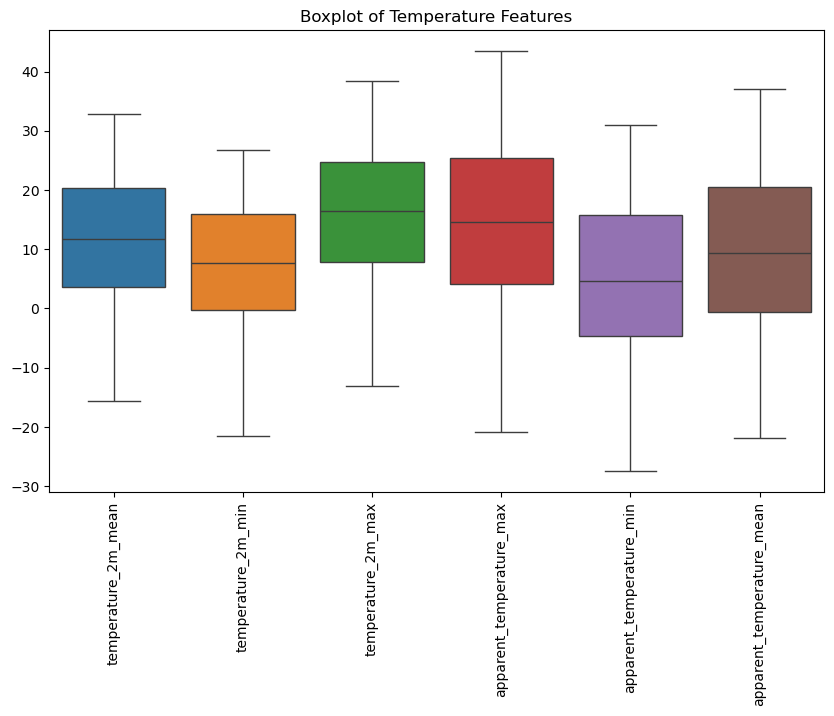

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:,1:7])
plt.xticks(rotation=90)
plt.title("Boxplot of Temperature Features")
plt.show()

<b>Checking Precipitation Sum Accuracy</b>

In [26]:
# Assigning a boolean field to validate the accuracy of the precipitation sum field
weekly_agg['precipitation_acc'] = (weekly_agg['precipitation_sum'] == (weekly_agg['showers_sum'] + (weekly_agg['snowfall_sum']*10) + weekly_agg['rain_sum']))

In [27]:
# computing the ratio between accurate and inaccurate precipitation sums
t_f = list(weekly_agg['precipitation_acc'].value_counts())
t_f[0] / sum(t_f)

0.7577969475779694

Even with the addition of the showers sum column, the precipitation sum is only 76% accurate. A removal of the column or further investigation may be warranted.

In [30]:
# Hypothesis that newer values are more accurate than older values due to potential issues with API's older data
weekly_agg.groupby('precipitation_acc').mean()['Week Ending']

precipitation_acc
False   2010-08-22 08:08:32.876712192
True    2010-08-31 08:22:16.602451968
Name: Week Ending, dtype: datetime64[ns]

<b>Restructuring Precipitation Cols</b>

In [41]:
# convert snowfall sum to mm and compute precipitation sum to only include rain and snowfall
weekly_agg['precipitation_sum'] = weekly_agg['rain_sum'] + (weekly_agg['snowfall_sum']*10)
weekly_agg.drop('showers_sum', axis=1)

,Week Ending,temperature_2m_mean,temperature_2m_min,temperature_2m_max,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,precipitation_hours,daylight_duration,sunshine_duration,snowfall_sum,rain_sum,precipitation_acc
0,1996-03-24 04:00:00,3.571250,-1.672500,10.427501,6.503645,-6.534769,-0.805065,0.000000,0.0,44429.293000,40204.098000,0.000000,0.000000,True
1,1996-03-31 04:00:00,3.867679,-4.522500,14.877501,12.330812,-8.964521,-0.075191,111.899993,23.0,45082.879857,34754.791714,10.919999,2.700000,False
2,1996-04-07 04:00:00,4.881071,-0.372500,12.977500,9.744807,-4.841195,0.867544,45.999999,56.0,46217.764857,25557.522000,1.190000,34.100000,False
3,1996-04-14 04:00:00,5.854881,-2.372500,22.277500,20.512278,-6.104808,1.637218,161.500006,51.0,47320.396857,28840.952143,14.910001,12.400000,False
4,1996-04-21 04:00:00,10.587024,-0.572500,23.577500,21.956192,-3.930990,7.647923,38.300000,25.0,48405.410857,35381.839714,0.000000,38.300000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,2025-01-05 04:00:00,3.047334,-4.048500,12.551500,10.251991,-9.443724,-1.411274,16.199999,13.0,33610.959143,26690.247000,0.000000,16.199999,True
1503,2025-01-12 04:00:00,-2.937190,-9.148499,4.401500,0.155787,-15.655720,-8.235336,25.900001,12.0,34035.163714,22319.003000,2.590000,0.000000,False
1504,2025-01-19 04:00:00,-1.033024,-6.348500,6.151500,2.847114,-11.863916,-5.461849,64.000000,20.0,34637.977714,19796.373657,6.160000,2.400000,False
1505,2025-01-26 04:00:00,-8.049393,-17.098500,3.651500,-1.059156,-21.739895,-12.611991,4.200000,6.0,35379.696000,30531.417429,0.420000,0.000000,False


In [43]:
# converting snowfall column to mm to avoid discrepancy
weekly_agg['snowfall_sum'] = weekly_agg['snowfall_sum']*10

<b>Store data and preserve datatypes</b>

In [46]:
weekly_agg.drop('precipitation_acc', axis=1).to_pickle('data/processed/weather.pkl')